<a href="https://colab.research.google.com/github/DavidL1023/MLServerOptimization/blob/Mason-model/prophet_w_cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import matplotlib.pyplot as plt

In [21]:
# Load the CSV file and adjust column names
file_path = 'aggregated_clean.csv'
data = pd.read_csv(file_path, header=None, names=['ds', 'y'])

# Convert the 'ds' column to datetime format
data['ds'] = pd.to_datetime(data['ds'])

In [22]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with the data
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pu5b2he/4us__dbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pu5b2he/8dl199cy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14171', 'data', 'file=/tmp/tmp5pu5b2he/4us__dbh.json', 'init=/tmp/tmp5pu5b2he/8dl199cy.json', 'output', 'file=/tmp/tmp5pu5b2he/prophet_modelnoflwwwm/prophet_model-20240220214835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Create a future dataframe for the next 24 hours at 5-minute intervals -- 288 periods = (24hrs * 60 min/hr) / (5 mininterval)
future = model.make_future_dataframe(periods=288, freq='5min')

# Make Prediction
forecast = model.predict(future)

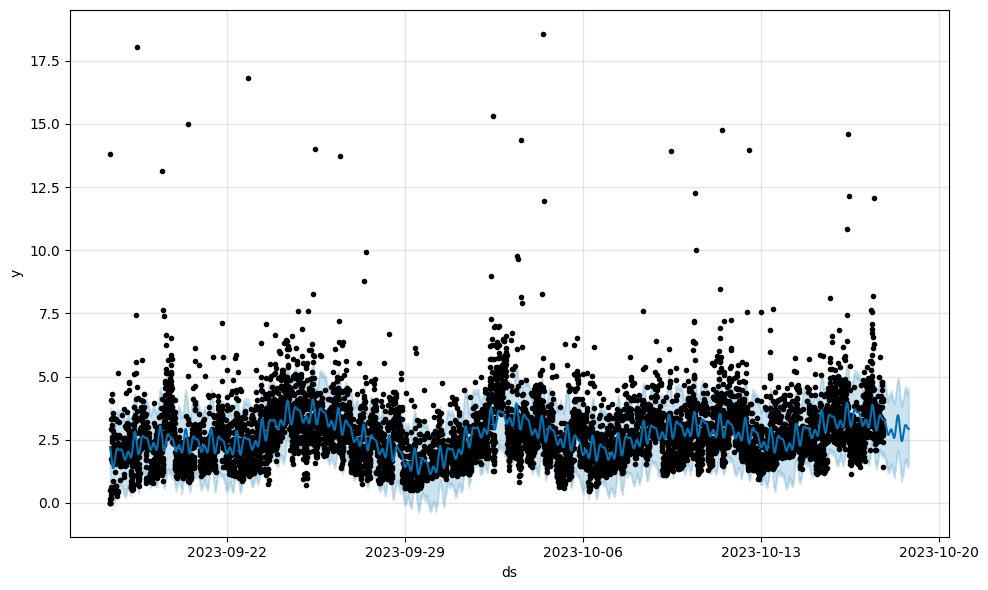

In [25]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

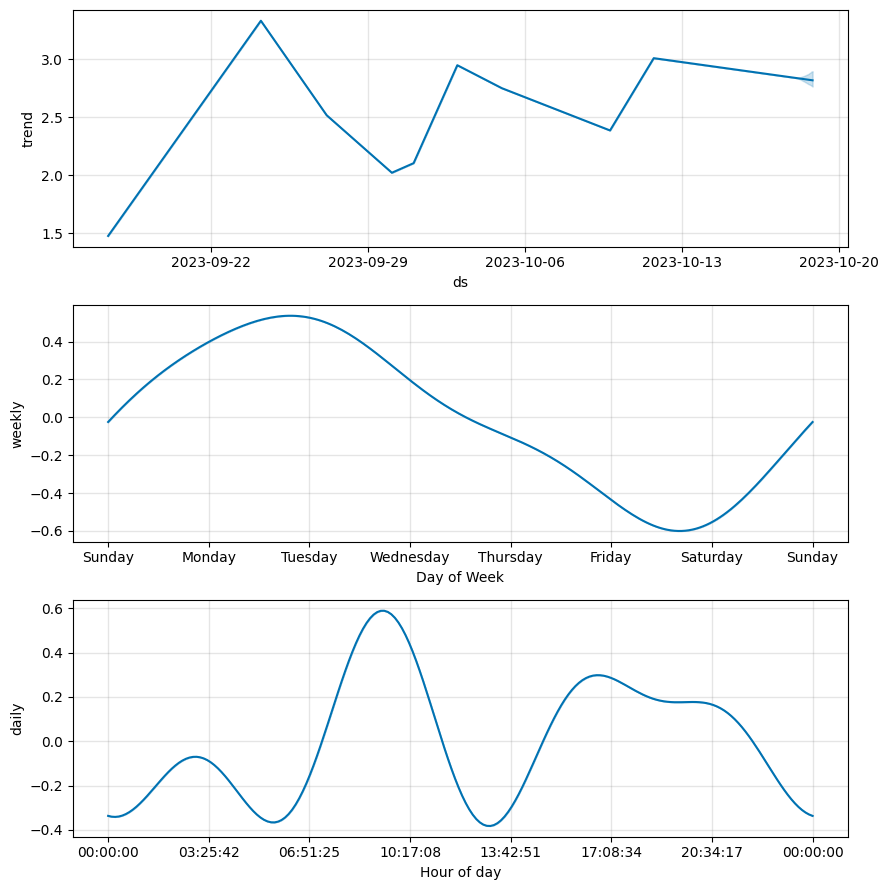

In [26]:
# Plot components
fig2 = model.plot_components(forecast)
plt.show()

INFO:prophet:Making 5 forecasts with cutoffs between 2023-10-11 13:30:00 and 2023-10-17 13:30:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pu5b2he/kkw0eus2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pu5b2he/3u9v_5wl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77675', 'data', 'file=/tmp/tmp5pu5b2he/kkw0eus2.json', 'init=/tmp/tmp5pu5b2he/3u9v_5wl.json', 'output', 'file=/tmp/tmp5pu5b2he/prophet_model5to1grhh/prophet_model-20240220215031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:50:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pu5b2he/vsqdx68p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pu5b2he/lokxrjx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

          horizon       mse      rmse       mae      mape     mdape     smape  \
0 0 days 00:40:00  0.516003  0.718333  0.570108  0.264317  0.189287  0.228338   
1 0 days 00:45:00  0.545172  0.738358  0.591439  0.272007  0.200373  0.234093   
2 0 days 00:50:00  0.556352  0.745890  0.606267  0.263136  0.203872  0.232186   
3 0 days 00:55:00  0.620337  0.787615  0.640619  0.292914  0.216215  0.249052   
4 0 days 01:00:00  0.663902  0.814802  0.671414  0.313322  0.203872  0.263052   

   coverage  
0  0.994444  
1  0.972222  
2  0.972222  
3  0.944444  
4  0.944444  


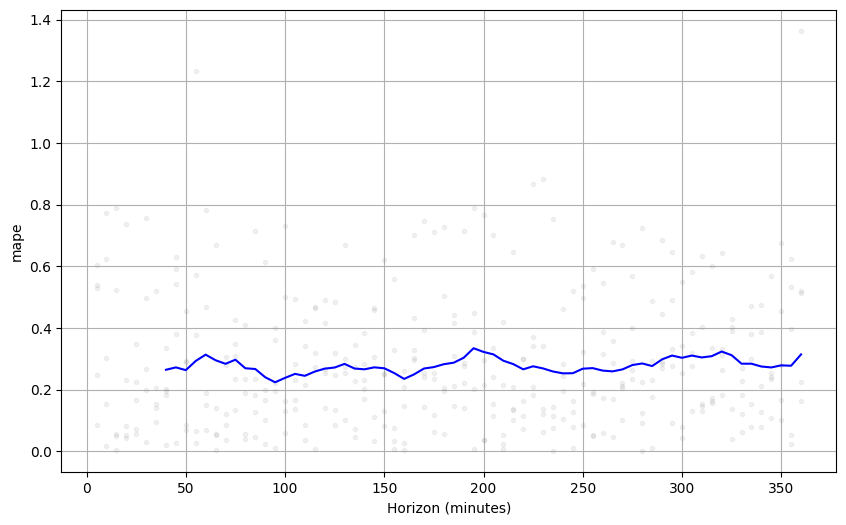

In [28]:
# Cross-validation
# Need to adjust parameters based on characteristics of dataset
# Have to experiment with different paramters but so far so good
df_cv = cross_validation(model, initial='552 hours', period='36 hours', horizon='6 hours') # These parameters have worked best so far
# Train for 23 days, forecast ahead 6 hours from each cutoff, and each cutoff every 36 hours

# Compute performance metrics and output
df_p = performance_metrics(df_cv)
print(df_p.head())
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()